# Linear Regression

With the Linear regression method, we are trying to predict the values for 2025

For this we are going to first load the data from the dataset

In [1]:
import pandas as pd
from pathlib import Path

path = Path("..")

file_mean = next(path.rglob("**/LAEI_2019_NA_FILLED_WITH_MEAN.csv"))
dataframe = pd.read_csv(file_mean)
print("Data with Mean Imputation:\n", dataframe.head())

Data with Mean Imputation:
    Year              Sector  ...        pm2.5           co2
0  2013    Accidental Fires  ...    78.041130  9.550853e+05
1  2013         Agriculture  ...    16.049516  6.776104e+03
2  2013            Aviation  ...    58.381094  1.054197e+06
3  2013             Biomass  ...  1054.000324  9.550853e+05
4  2013  Commercial Cooking  ...   547.828374  9.550853e+05

[5 rows x 7 columns]


In [2]:
### Process Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Initialize the Label Encoder
encoder = LabelEncoder()

# Encode 'Main Source Category' using explicit row and column indexing
dataframe["Sector"] = encoder.fit_transform(dataframe.loc[:, "Sector"])

Defining the function to train the model

In [3]:
# Trying to use date and sector as feature to predict the pollutants
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
X = dataframe.iloc[:, :2]
y = dataframe.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=15)
model.fit(X_train, y_train)
model.score(X_test, y_test)

X_test[['nox_pred', 'n2o_pred', 'pm10_pred', 'pm2.5_pred', 'co2_pred']] = model.predict(X_test)

In [4]:
merged_predict_test = X_test.merge(y_test, on=X_test.index)
nox = merged_predict_test[[col for col in merged_predict_test.columns if col.startswith("nox") or col in ("Year", "Sector")]]
n2o = merged_predict_test[[col for col in merged_predict_test.columns if col.startswith("n2o") or col in ("Year", "Sector")]]
pm10 = merged_predict_test[[col for col in merged_predict_test.columns if col.startswith("pm10") or col in ("Year", "Sector")]]
pm25 = merged_predict_test[[col for col in merged_predict_test.columns if col.startswith("pm2.5") or col in ("Year", "Sector")]]
co2 = merged_predict_test[[col for col in merged_predict_test.columns if col.startswith("co2") or col in ("Year", "Sector")]]

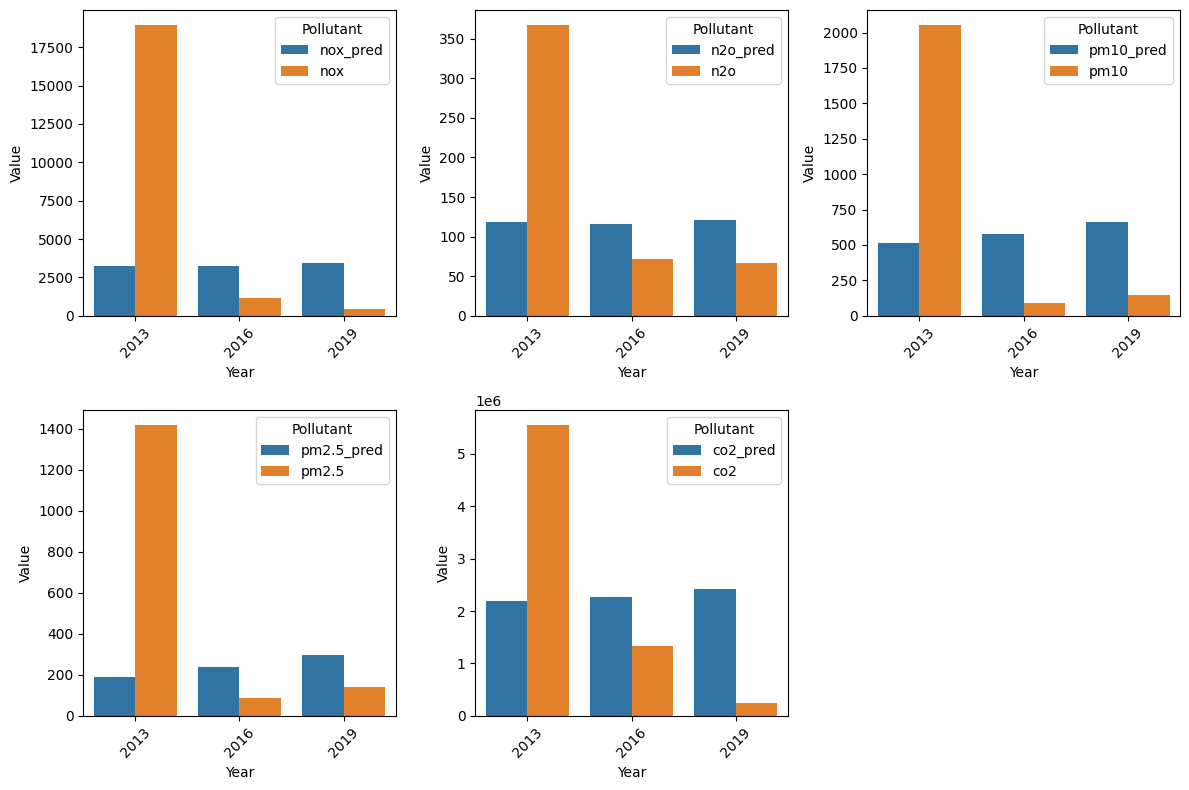

In [8]:
# Create a grid of subplots
import matplotlib.pyplot as plt
import seaborn as sns
pollutants = ["nox", "pm10", "pm2.5", "co2"]

num_pollutants = len(pollutants)
cols = 3  # Number of columns
rows = 2  # Calculate number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, pollutant in enumerate([nox, n2o, pm10, pm25, co2]):
    # Melt the DataFrame for Seaborn
    melted_df = pollutant.melt(id_vars=["Year", "Sector"], var_name="Pollutant", value_name="Value")
    
    # Create the bar plot
    sns.barplot(data=melted_df, x="Year", y="Value", hue="Pollutant", ax=axes[i], errorbar=None)
    
    axes[i].set_xlabel('Year')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()

In [9]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()

pollutants = ["nox", "n2o", "pm10", "pm2.5", "co2", ]
models = {}
chart_data = []

for pol in pollutants:
    X = dataframe[list(filter(lambda x: pol != x or pol.lower() in ("year", "sector"), dataframe.columns))]
    y = dataframe[pol]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=15)
    model.fit(X_train, y_train)
    print(pol, model.score(X_test, y_test))
    X_test[f'{pol}_pred'] = model.predict(X_test)
    X_test[pol] = y_test
    chart_data.append(X_test[["Year", *[col for col in X_test if col.startswith(pol)]]])
    models[pol] = {"model": model}




nox 0.8474323442532182
n2o 0.673245781575914
pm10 0.8217961465348727
pm2.5 0.7351494942397361
co2 -0.14062584125932776


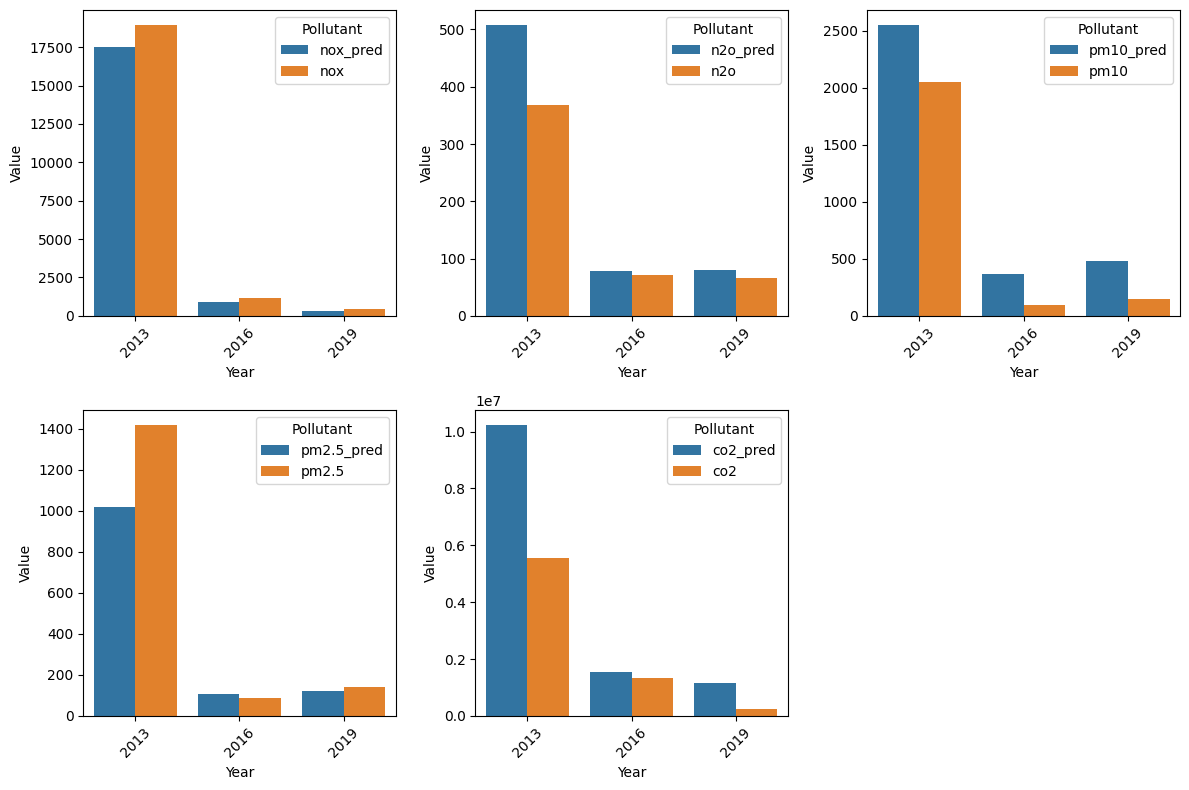

In [10]:
# Create a grid of subplots
num_pollutants = len(pollutants)
cols = 3  # Number of columns
rows = 2  # Calculate number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, pollutant in enumerate(chart_data):
    # Melt the DataFrame for Seaborn
    melted_df = pollutant.melt(id_vars=["Year"], var_name="Pollutant", value_name="Value")
    
    # Create the bar plot
    sns.barplot(data=melted_df, x="Year", y="Value", hue="Pollutant", ax=axes[i], errorbar=None)
    
    # Customize the plot
    # axes[i].set_title(f'Comparison of {pollutant.upper()} Levels by Year')
    axes[i].set_xlabel('Year')
    # axes[i].set_ylabel(f'{pollutant.upper()} Levels')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()